# Pandas ve Numpy kütüphanelerini kullanarak Polynomial Regresyon modeli oluşturma

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv("real_estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [40]:
X = data.iloc[:,3]
Y= data.iloc[:,-1]

In [41]:
def featureNormalization(X):
    
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_scale = (X - mean)/std
    return X_scale
X = featureNormalization(X)
Y = featureNormalization(Y)

In [42]:
from sklearn.model_selection import train_test_split


x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33, random_state=0)

x_train = x_train.sort_index().values
y_train = y_train.sort_index().values
x_test = x_test.sort_index().values
y_test = y_test.sort_index().values
x_train = x_train.reshape(len(x_train),1)
x_test = x_test.reshape(len(x_test),1)
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree =3)

x_train1 = poly.fit_transform(x_train)
x_test1 = poly.fit_transform(x_test)
x_test1 = poly.fit_transform(x_test)
y_test1 = poly.fit_transform(y_test)
Y

In [44]:
n = x_train1.shape[1]
m=len(y_train)
k = len(x_test)



X_train = np.append(np.ones((m,1)),x_train1,axis=1)

x_test = np.append(np.ones((k,1)),x_test1,axis=1)
y_test = y_test.reshape(k,1)

Y_train = y_train.reshape(m,1)


theta=np.zeros((n+1,1))


In [45]:
def computeCost(x_train,y_train,theta): 
    
    m=len(y_train)
    
    hypothesis = x_train.dot(theta)  
    
    square_err = (hypothesis - y_train)**2
    
    return 1/(2*m)*np.sum(square_err)


computeCost(X_train,Y_train,theta)


0.5208051580271215

In [46]:
def gradientDescent(x_train,y_train,theta,alpha,num_iters):

    m=len(y_train)
    
    J=[]
    
    for i in range(num_iters):
        hypothesis = x_train.dot(theta)
        error = np.dot(x_train.transpose(),(hypothesis - y_train))
        descent = alpha * 1/m * error
        
        theta  -= descent
        
        J.append(computeCost(x_train,y_train,theta))
    
    return theta, J



theta,J = gradientDescent(X_train,Y_train,theta,0.01,2000)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

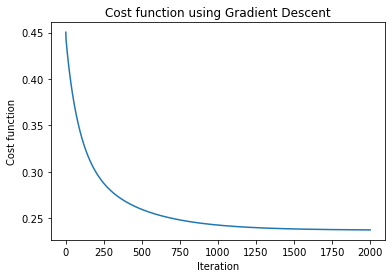

In [47]:

plt.plot(J)
plt.xlabel("Iteration")
plt.ylabel("Cost function")
plt.title("Cost function using Gradient Descent")

In [48]:
def predict(x_test,theta):
    
    y_pred = np.dot(x_test,theta)
    
    return y_pred

In [49]:
y_pred =predict(x_test,theta)
y_pred.shape

(137, 1)

In [50]:
y_test1 = y_test.reshape(len(y_test),1)

In [51]:
def r2değeri(y_test1,y_pred):
    hkt = (y_test1- y_pred)**2
    oft = (y_test1 - np.mean(y_test1))**2
    r2 = 1-(np.sum(hkt)/np.sum(oft))
    return r2

In [52]:
print("r2 değeri: "+ str(round(r2değeri(y_test1,y_pred),6)))

r2 değeri: 0.574569


In [53]:
def mSE(y_pred, y_test):
    
    return np.sum((y_pred- y_test)**2) / len(y_pred)



print("Mean Squared Error değeri: "+ str(round(mSE(y_pred, y_test1),5)))

Mean Squared Error değeri: 0.38869


# Scikit-learn kütüphanelerini kullanarak Polynomial Regresyon modeli oluşturma

In [54]:
data1 = pd.read_csv("real_estate.csv")

In [55]:
X1 = data1.iloc[:,3]
Y1 = data1.iloc[:,-1]


In [56]:
from sklearn.model_selection import train_test_split


x_train, x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.33, random_state=0)

x_train = x_train.sort_index().values

y_train = y_train.sort_index().values

x_test = x_test.sort_index().values

y_test = y_test.sort_index().values



x_train = x_train.reshape(len(x_train),1)
x_test = x_test.reshape(len(x_test),1)
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)



x_train.shape

(277, 1)

In [57]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

X1 = sc.fit_transform(x_train)
Y1 = sc.fit_transform(Y_train)
x_test1 = sc.fit_transform(x_test)
y_test1 = sc.fit_transform(y_test)



In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree =3)

x_poly = poly.fit_transform(X1)


x_poly_test = poly.fit_transform(x_test1)



In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_poly,Y1)

y_pred1 = lr.predict(x_poly_test)
y_pred1.shape


(137, 1)

In [61]:
from sklearn.metrics import r2_score

print("R-squared: ", r2_score(y_test1, y_pred1))

R-squared:  0.5830283062331858


In [62]:
def mSE(y_pred, y_test):
    
    return np.sum((y_pred- y_test)**2) / len(y_pred)


mSE(y_pred1, y_test1)

print("Mean Squared Error değeri: "+ str(round(mSE(y_pred1, y_test1),5)))

Mean Squared Error değeri: 0.41697
